In [ ]:
import tensorflow as tf
import pandas as pd
import keras as kr
import seaborn as sb

X_train = pd.read_csv("https://raw.githubusercontent.com/ereason/neural-network-iis-lab3/main/xtrain.csv", header=None)
Y_train = pd.read_csv("https://raw.githubusercontent.com/ereason/neural-network-iis-lab3/main/ytrain.csv", header=None)
X_test = pd.read_csv("https://raw.githubusercontent.com/ereason/neural-network-iis-lab3/main/xtest.csv", header=None)
Y_test = pd.read_csv("https://raw.githubusercontent.com/ereason/neural-network-iis-lab3/main/ytest.csv", header=None)

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Инициализация НС
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

classifier.fit(X_train, Y_train, batch_size = 1, epochs = 25)

Y_pred = classifier.predict(X_test) # подаём на вход обученной НС тестовый набор данных
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]

total = 0
correct = 0
wrong = 0
for i in range(len(Y_pred)):
  total=total+1
  if(Y_test.at[i,0] == Y_pred[i]):
    correct=correct+1
  else:
    wrong=wrong+1

print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

Epoch 1/25
455/455 [==============================] - 1s 2ms/step - loss: 0.3215
Epoch 2/25
455/455 [==============================] - 1s 2ms/step - loss: 0.1307
Epoch 3/25
455/455 [==============================] - 1s 3ms/step - loss: 0.1062
Epoch 4/25
455/455 [==============================] - 1s 3ms/step - loss: 0.0823
Epoch 5/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0800
Epoch 6/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0879
Epoch 7/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0873
Epoch 8/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0826
Epoch 9/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0857
Epoch 10/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0804
Epoch 11/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0829
Epoch 12/25
455/455 [==============================] - 1s 2ms/step - loss: 0.0829
Epoch 13/25
455/455 [====

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 32, 32, 128)      

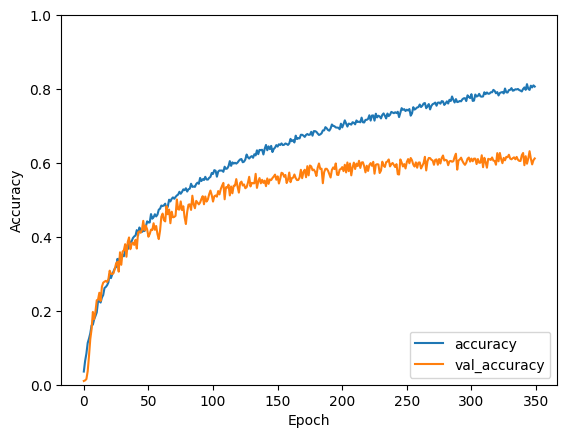

313/313 [==============================] - 2s 7ms/step - loss: 1.5043 - accuracy: 0.6226
0.6226000189781189
Fit time 3016.7488176822662


In [2]:
import time
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal, Constant
from keras import optimizers
from keras import datasets
from pandas.io import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(
    train_images,
    train_labels,
    test_size=0.2,
    random_state=93,
)

train_datagen.fit(X_train)

############################################################################################
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(
    BatchNormalization(
        momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)
    )
)

model.add(Dense(100, activation='softmax'))


model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

############################################################################################
timeStart = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=350,
          validation_data=(X_validation, y_validation),
          verbose=1)
timeEnd = time.time()

training_time = timeStart - timeEnd
############################################################################################

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

plt.show()


test_loss, test_acc =  model.evaluate(test_images, test_labels)

model.save("./savedModel100.keras")
hist_df = pd.DataFrame(history.history)

# save to csv:
hist_csv_file = './history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)


print(test_acc)
print(f"Fit time {timeEnd-timeStart}")